# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset, by showing relevant visualizations that help understand the problem you are modelling.

Please make sure to write down your conclusions in the final notebook and to remove these intructions.

# Imports

In [21]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [22]:
df = pd.read_csv("../data/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [23]:
# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


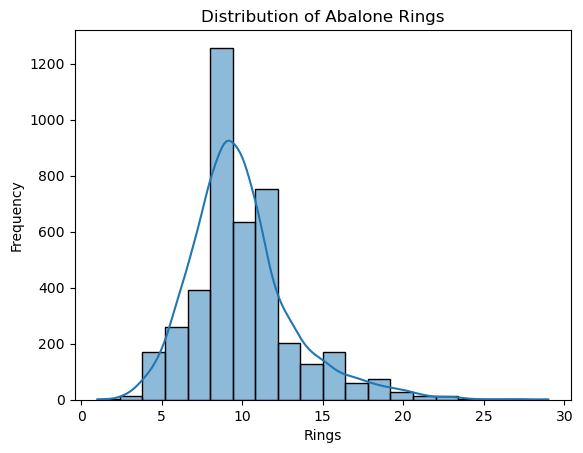

In [31]:
# Example: Visualize the distribution of the 'Rings' column
sns.histplot(df['Rings'], bins=20, kde=True)
plt.title('Distribution of Abalone Rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

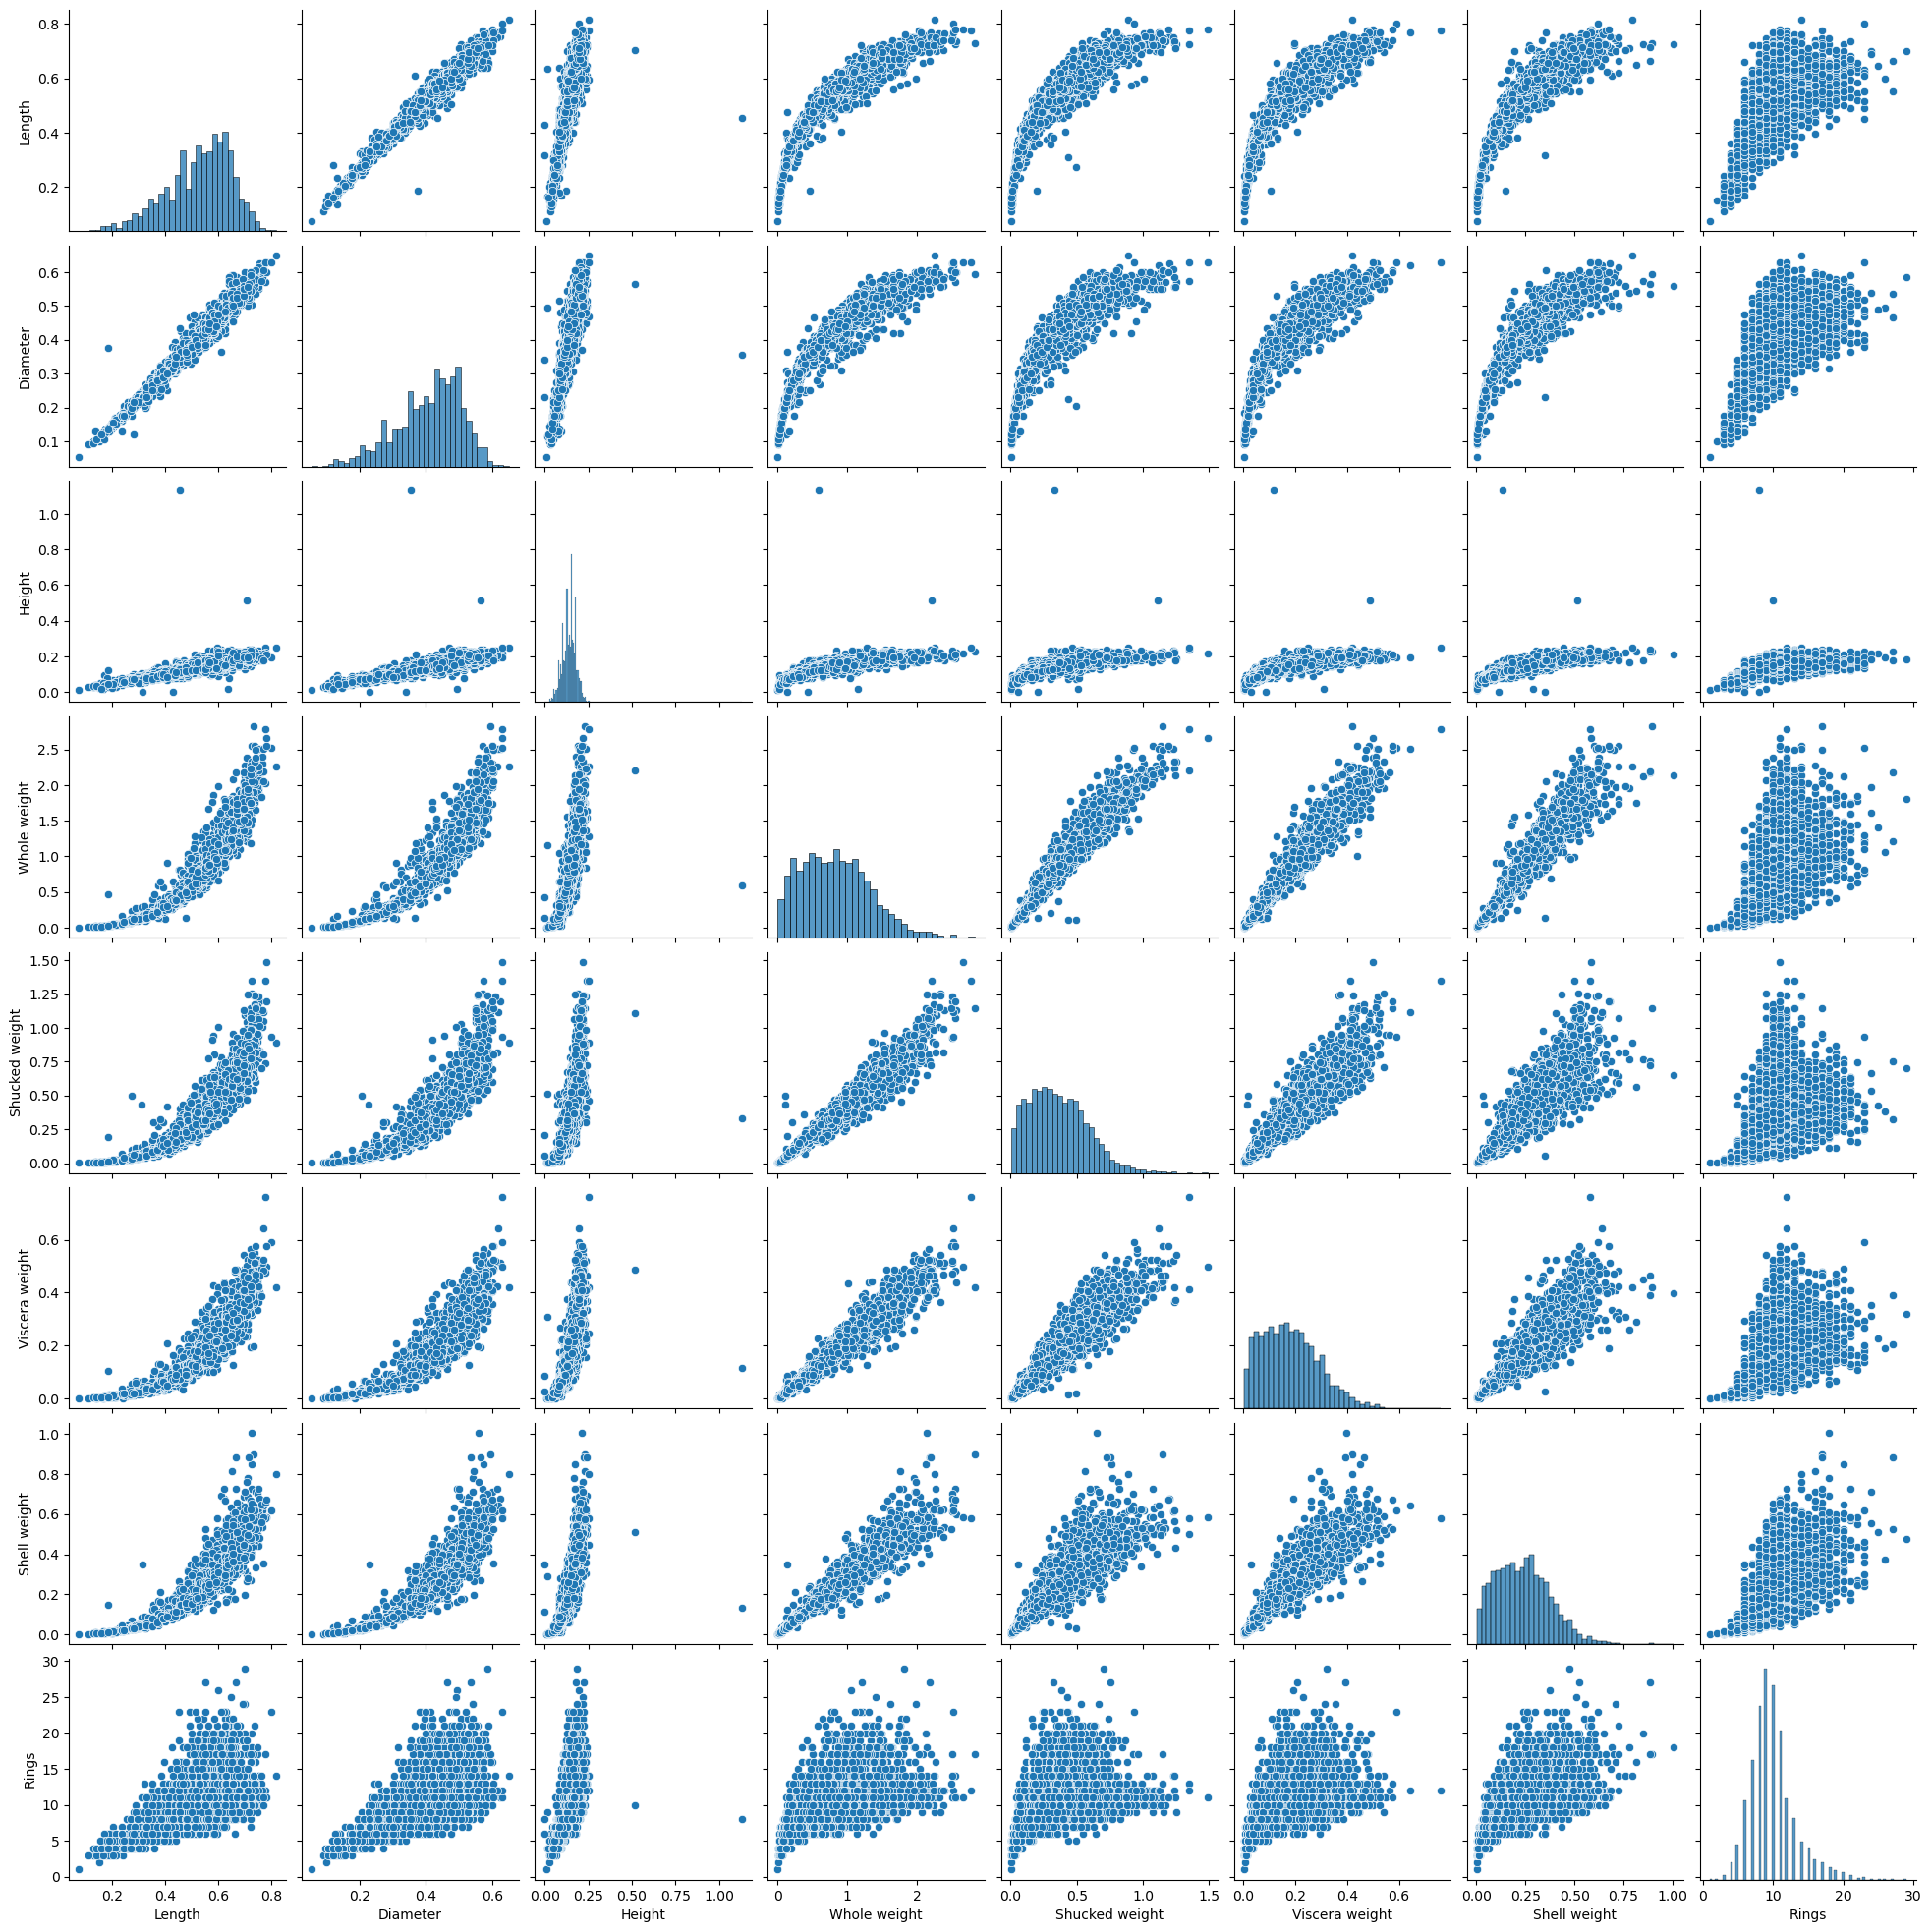

In [25]:
# Example: Pairplot to see relationships between features
sns.pairplot(df)
plt.show()

We can observe high positive corrleation between height, width, diameter and the various weights. There seems to be a couple of outliers in each pairplots, most noticebly for height but given the size of the dataset this shouldn't be a problem. The distribution of rings is slightly left skewed. The relationship between diameter/length and shell/viscera/shucked/whole weight qseems to be non linear so dependingh on model used, feature transformation might be needed.

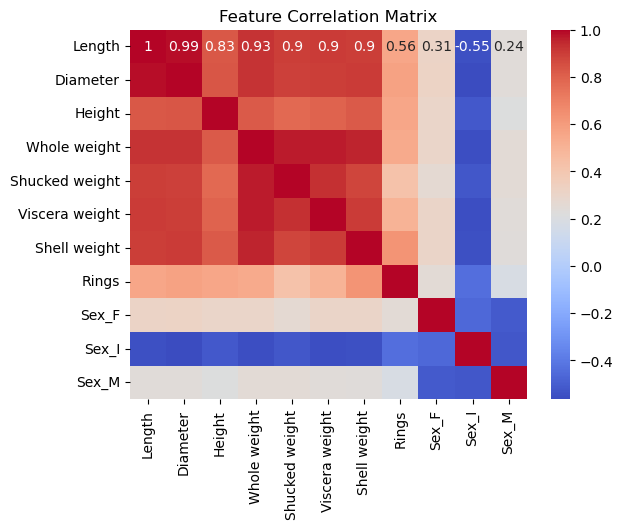

In [26]:
# Compute the correlation matrix
df_encoded = pd.get_dummies(df, columns=['Sex'])

# Compute the correlation matrix
corr = df_encoded.corr()

# Visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

As expected all physical attributes are highly correlated, a bigger shell shall be heavier. The number of rings is most correlated with the shell weight which seems to make sense. Intrestingly the Sex=I is negatively correlated with all the attributes, we will now investigate the impact of the sex on the other features.

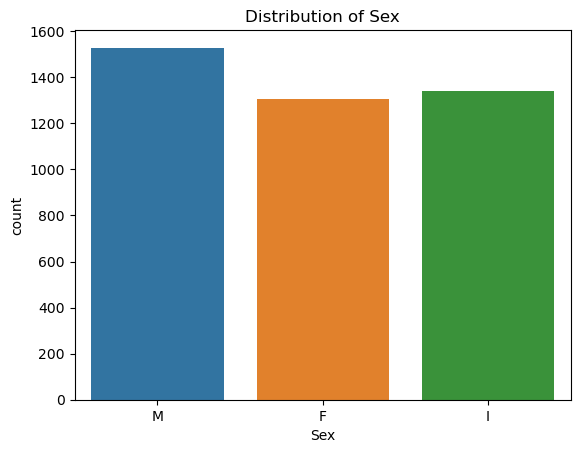

In [27]:
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Sex')
plt.show()

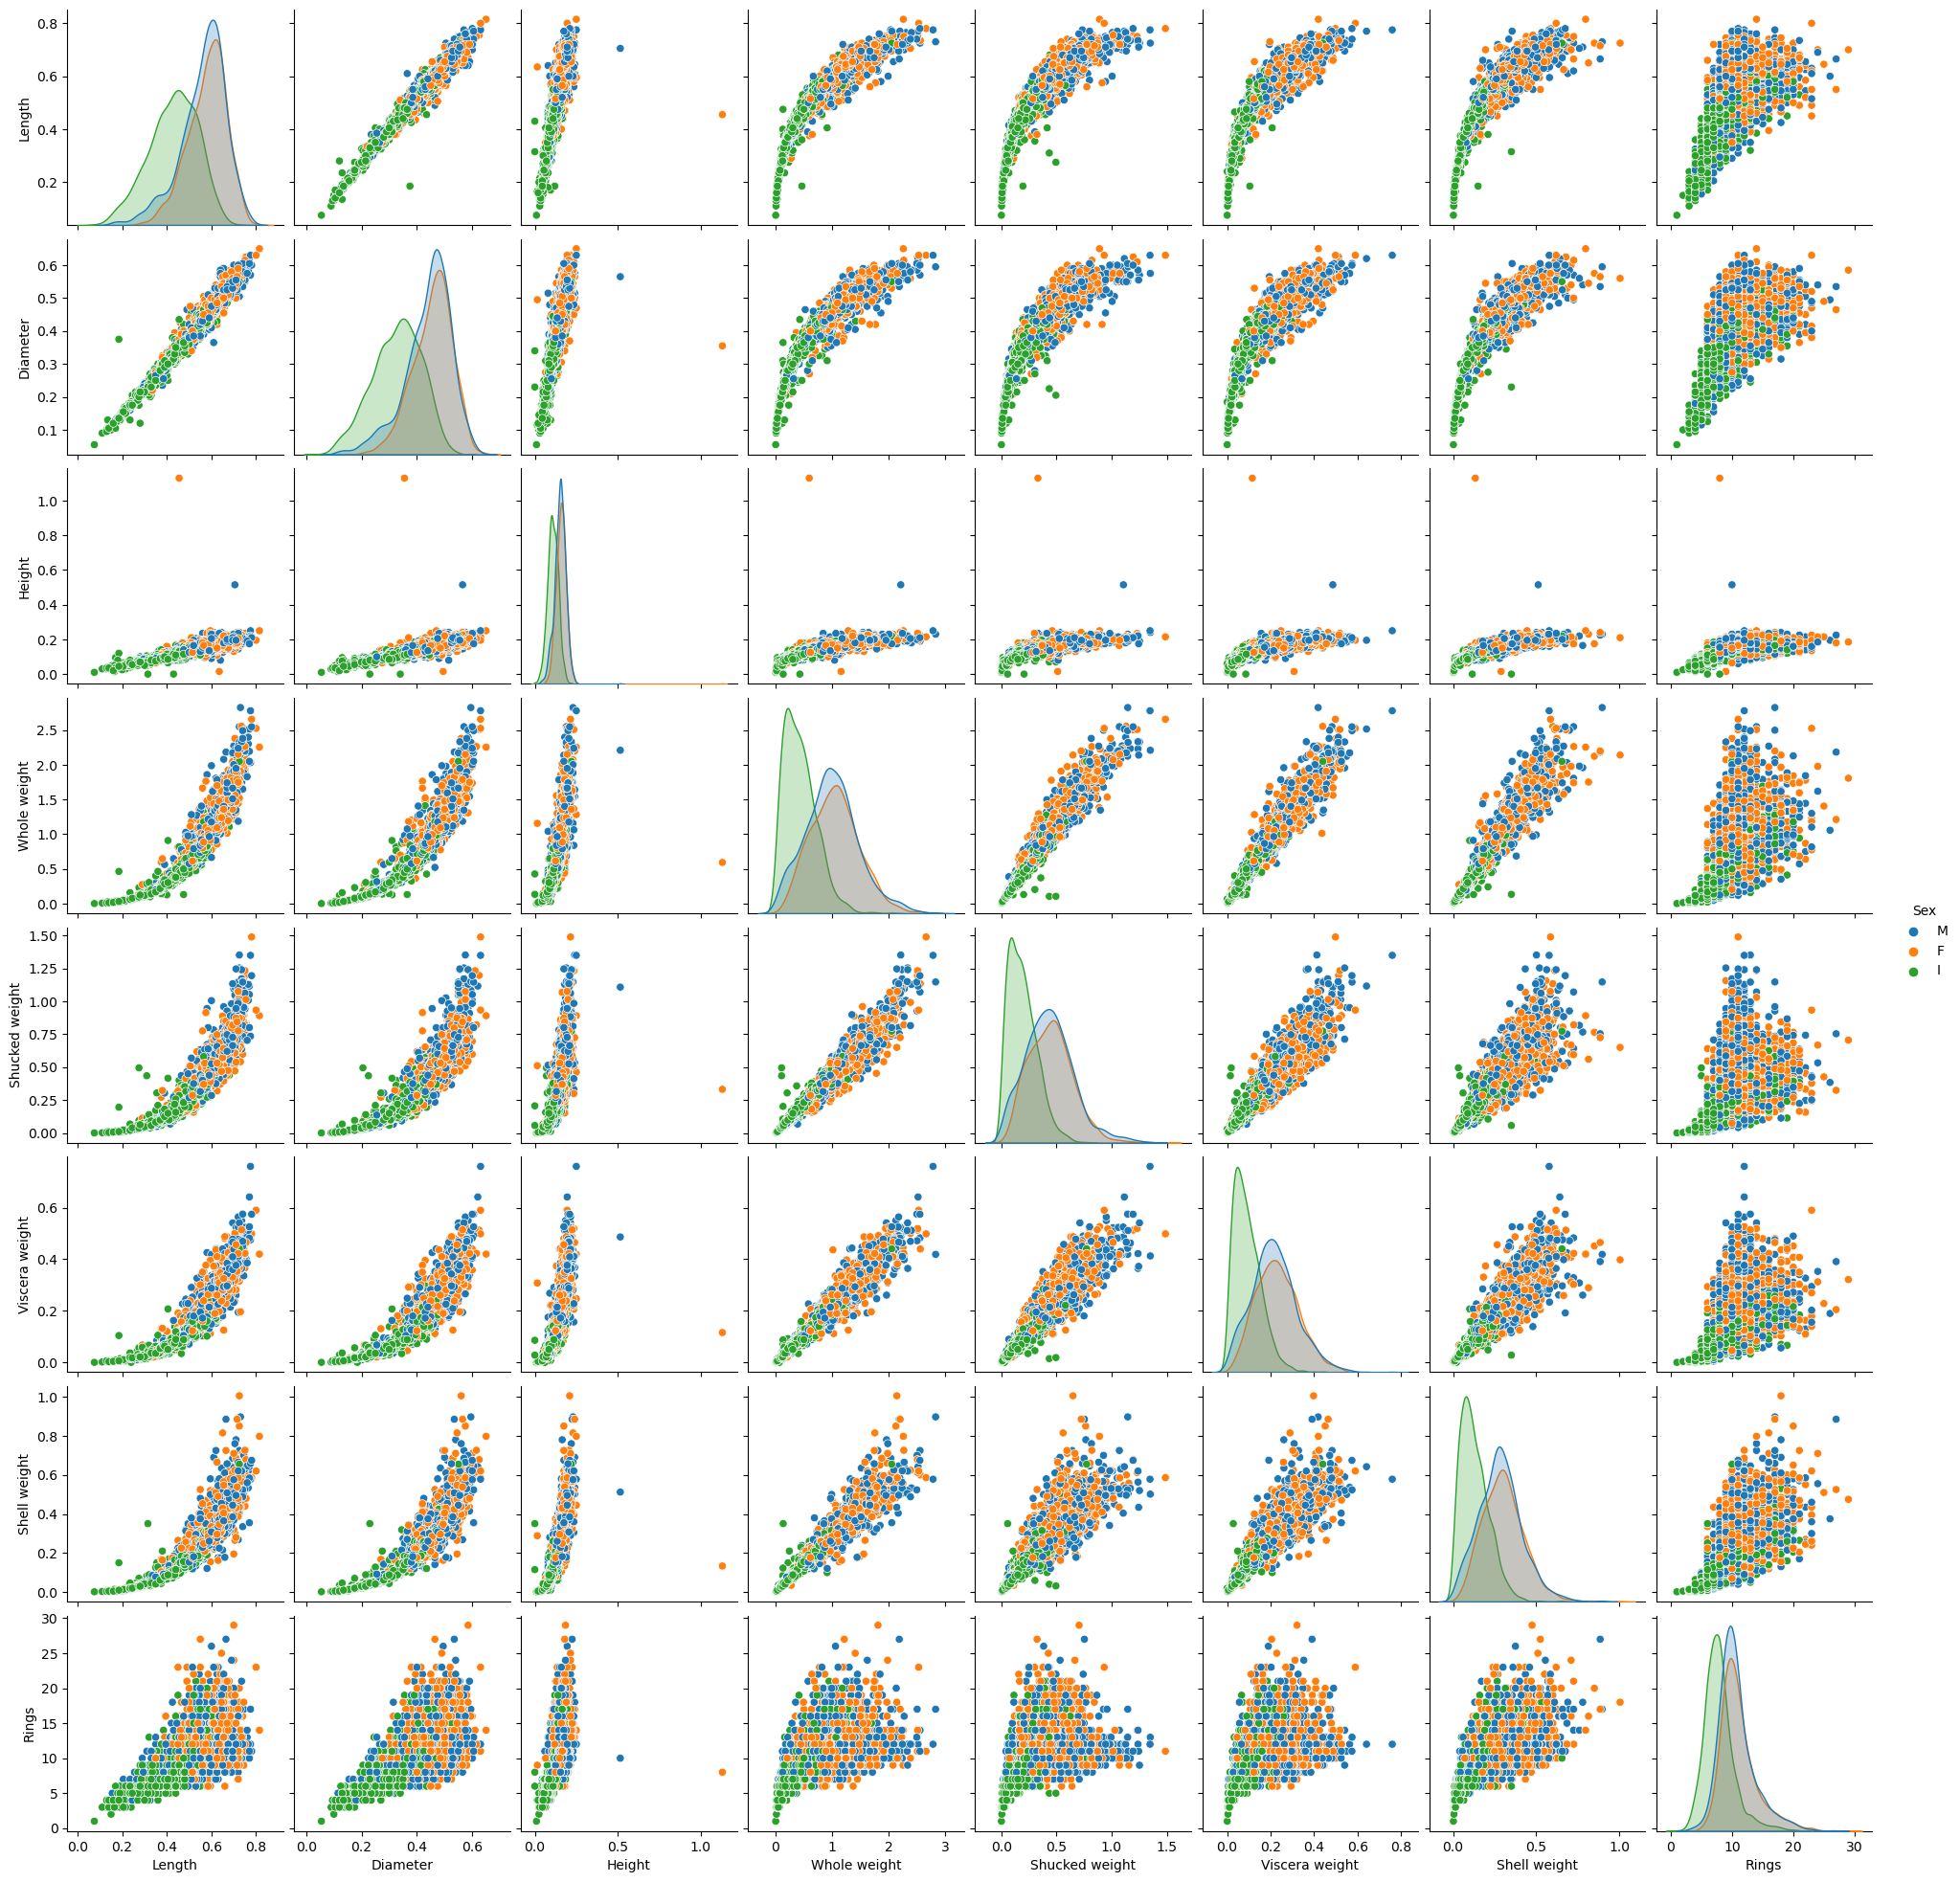

In [28]:
sns.pairplot(df, hue='Sex')
plt.show()

Abalones with the sex = I always seem to be the smallest, weigh the least and have the least rings compared to their counter part. The other 2 sexes have seem to have the same distribution in all aspects.

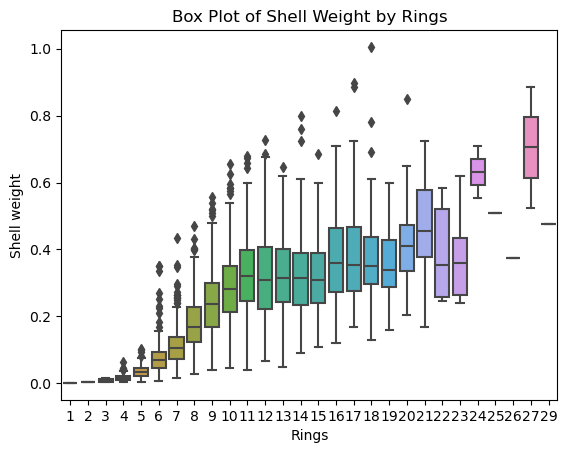

In [34]:
sns.boxplot(x='Rings', y='Shell weight', data=df)
plt.title('Box Plot of Shell Weight by Rings')
plt.show()

The variability in shell weight increases with the number of rings, suggesting more diversity in older abalones.

In [30]:
corr_with_target = df_encoded.corr()['Rings'].sort_values(ascending=False)
print(corr_with_target) 

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex_F             0.250279
Sex_M             0.181831
Sex_I            -0.436063
Name: Rings, dtype: float64
